# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 20.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
332748,0.1904,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.1074,0.0024,0.0146,5,0,10,0
349581,0.1538,0.0024,0.0024,0.0024,0.0024,0.0024,0.0269,0.2222,0.0024,0.0024,0,0,0,0
255843,0.8691,0.2173,0.2954,0.2148,0.0708,0.1392,0.1929,0.2490,0.3174,0.2832,1,1,2,2
241599,0.3101,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.2515,0.0024,0.0024,6,0,17,0
427473,0.6543,0.0220,0.0024,0.0024,0.0024,0.0024,0.0024,0.1563,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(469983, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469983 entries, 0 to 469982
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469983 non-null  float64
 1   Emg2          469983 non-null  float64
 2   Emg3          469983 non-null  float64
 3   Emg4          469983 non-null  float64
 4   Emg5          469983 non-null  float64
 5   Emg6          469983 non-null  float64
 6   Emg7          469983 non-null  float64
 7   Emg8          469983 non-null  float64
 8   Emg9          469983 non-null  float64
 9   Emg10         469983 non-null  float64
 10  repetition    469983 non-null  int64  
 11  rerepetition  469983 non-null  int64  
 12  stimulus      469983 non-null  int64  
 13  restimulus    469983 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000
mean,0.519579,0.168986,0.110115,0.065947,0.035622,0.079689,0.445016,0.400604,0.146198,0.265693,3.157821,2.165272,5.597981,4.009179
std,0.555217,0.341448,0.236890,0.151314,0.078130,0.170031,0.786864,0.443671,0.346554,0.435951,3.483234,3.229908,6.578078,6.248982
min,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144000,0.002400,0.002400,0.002400,0.002400,0.002400,0.026900,0.151400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.383300,0.002400,0.002400,0.002400,0.002400,0.007300,0.114700,0.249000,0.002400,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.688500,0.166000,0.117200,0.053700,0.026900,0.073200,0.488300,0.444300,0.131800,0.312500,6.000000,4.000000,10.000000,7.000000
max,4.668000,4.438500,3.168900,2.612300,1.079100,1.953100,4.665500,4.668000,4.660600,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     200142
12     15607
2      15597
7      15595
4      15591
8      15588
9      15585
11     15572
6      15563
5      15543
10     15525
1      15524
3      15524
17     10407
14     10407
13     10406
15     10380
16     10328
19      5204
21      5202
18      5200
22      5171
23      5162
20      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

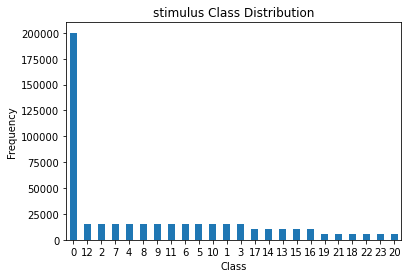

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
241904,0.2344,0.1685,0.0269,0.0024,0.0024,0.0073,0.5054,0.2710,0.0146,0.0952,6,6,17,17
80192,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0244,0.0024,0.0024,0,0,0,0
384838,0.0854,0.0024,0.0024,0.0024,0.0024,0.0024,0.0928,0.3589,0.0024,0.0049,0,0,0,0
199005,0.1465,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0928,0.0024,0.0024,0,0,0,0
119452,0.2759,0.0024,0.0024,0.0024,0.0024,0.0024,0.0195,0.1270,0.0024,0.0439,0,0,0,0


In [12]:
raw_data.shape

(383870, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383870 entries, 0 to 469982
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          383870 non-null  float64
 1   Emg2          383870 non-null  float64
 2   Emg3          383870 non-null  float64
 3   Emg4          383870 non-null  float64
 4   Emg5          383870 non-null  float64
 5   Emg6          383870 non-null  float64
 6   Emg7          383870 non-null  float64
 7   Emg8          383870 non-null  float64
 8   Emg9          383870 non-null  float64
 9   Emg10         383870 non-null  float64
 10  repetition    383870 non-null  int64  
 11  rerepetition  383870 non-null  int64  
 12  stimulus      383870 non-null  int64  
 13  restimulus    383870 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 52.0 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 85.48597181337432


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     39905
           1       0.80      0.80      0.80      2026
           2       0.76      0.75      0.76      1975
           3       0.74      0.76      0.75      1946
           4       0.75      0.75      0.75      1879
           5       0.72      0.73      0.72      1902
           6       0.75      0.75      0.75      2223
           7       0.80      0.78      0.79      2014
           8       0.73      0.72      0.73      2031
           9       0.73      0.71      0.72      2112
          10       0.70      0.70      0.70      2062
          11       0.72      0.75      0.74      2170
          12       0.68      0.69      0.68      2160
          13       0.73      0.74      0.73      1517
          14       0.70      0.71      0.71      1419
          15       0.67      0.71      0.69      1307
          16       0.78      0.77      0.77      1635
 

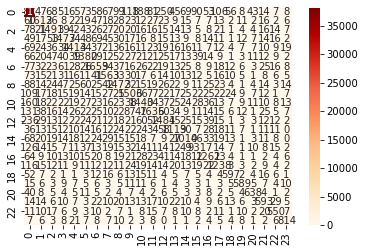

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.0946804907911531
MSE: 12.315536509755907
RMSE: 3.5093498699553893


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8552550127154961
Recall Score :  0.8548597181337432
f1_score :  0.8550263111291639


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.03993539479511


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     39905
           1       0.86      0.88      0.87      2026
           2       0.85      0.85      0.85      1975
           3       0.87      0.86      0.86      1946
           4       0.87      0.83      0.85      1879
           5       0.83      0.81      0.82      1902
           6       0.90      0.82      0.86      2223
           7       0.91      0.86      0.89      2014
           8       0.87      0.80      0.83      2031
           9       0.87      0.81      0.84      2112
          10       0.84      0.78      0.81      2062
          11       0.87      0.85      0.86      2170
          12       0.85      0.75      0.79      2160
          13       0.89      0.82      0.85      1517
          14       0.88      0.80      0.84      1419
          15       0.87      0.77      0.81      1307
          16       0.91      0.85      0.88      1635
 

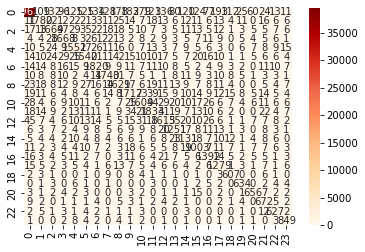

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.7053169041602626
MSE: 8.19827024774012
RMSE: 2.8632621688801256


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9090242048814602
Recall Score :  0.9103993539479511
f1_score :  0.9084755849368226


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.46427175866829


Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     39905
           1       0.96      0.93      0.94      2026
           2       0.93      0.91      0.92      1975
           3       0.93      0.90      0.92      1946
           4       0.95      0.89      0.91      1879
           5       0.91      0.91      0.91      1902
           6       0.96      0.89      0.92      2223
           7       0.96      0.91      0.94      2014
           8       0.94      0.88      0.91      2031
           9       0.94      0.87      0.90      2112
          10       0.91      0.85      0.88      2062
          11       0.92      0.91      0.91      2170
          12       0.92      0.80      0.86      2160
          13       0.95      0.90      0.93      1517
          14       0.94      0.87      0.90      1419
          15       0.94      0.86      0.90      1307
          16       0.94      0.91      0.93      1635
 

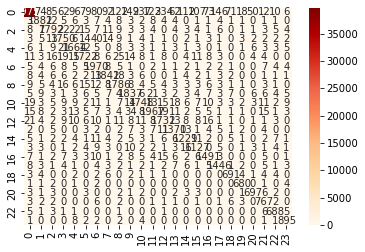

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.46259150233151847
MSE: 5.491533592101493
RMSE: 2.3434021405003223


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9444901344246518
Recall Score :  0.944642717586683
f1_score :  0.9437894859505728


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 88.71623205772788


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     39905
           1       0.85      0.83      0.84      2026
           2       0.80      0.80      0.80      1975
           3       0.82      0.79      0.80      1946
           4       0.84      0.78      0.81      1879
           5       0.76      0.75      0.75      1902
           6       0.86      0.75      0.80      2223
           7       0.88      0.82      0.85      2014
           8       0.80      0.74      0.77      2031
           9       0.76      0.70      0.73      2112
          10       0.76      0.72      0.74      2062
          11       0.79      0.77      0.78      2170
          12       0.80      0.67      0.73      2160
          13       0.79      0.72      0.76      1517
          14       0.83      0.75      0.79      1419
          15       0.81      0.75      0.78      1307
          16       0.85      0.82      0.83      1635
 

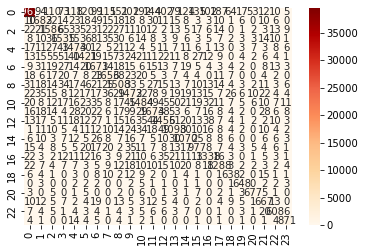

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.8107953213327429
MSE: 8.877406413629615
RMSE: 2.979497678070855


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8838253688701196
Recall Score :  0.8871623205772787
f1_score :  0.8844527057501829


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 95.07124807877668


Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     39905
           1       0.97      0.94      0.96      2026
           2       0.95      0.92      0.94      1975
           3       0.96      0.91      0.93      1946
           4       0.97      0.90      0.93      1879
           5       0.94      0.91      0.93      1902
           6       0.97      0.90      0.94      2223
           7       0.97      0.93      0.95      2014
           8       0.95      0.89      0.92      2031
           9       0.95      0.88      0.92      2112
          10       0.92      0.85      0.88      2062
          11       0.94      0.91      0.92      2170
          12       0.94      0.82      0.87      2160
          13       0.97      0.92      0.94      1517
          14       0.95      0.87      0.91      1419
          15       0.95      0.88      0.92      1307
          16       0.96      0.93      0.94      1635
 

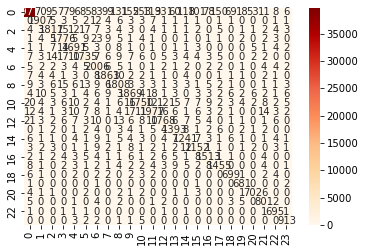

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.42828301247818273
MSE: 5.114921718290046
RMSE: 2.2616192690835577


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9509419845134838
Recall Score :  0.9507124807877667
f1_score :  0.9500120479146459
